In [12]:
# !pip install opendatasets

In [13]:
import opendatasets as ps

In [14]:
# url = 'https://www.kaggle.com/sdolezel/black-friday'
# r = ps.download(url, allow_redirects=True)

In [15]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [17]:
df =pd.read_csv('black-friday/train.csv')

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [21]:
df['Product_Category_2'].isnull().sum()

173638

In [22]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Product_Category_2, Length: 550068, dtype: bool

In [24]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
remove_COlumns=[]
df = df.drop(['User_ID','Product_ID','City_Category',], axis = 1)


In [26]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,2,0,3,8.0,16.0,8370
1,F,0-17,10,2,0,1,6.0,14.0,15200
2,F,0-17,10,2,0,12,8.0,16.0,1422
3,F,0-17,10,2,0,12,14.0,16.0,1057
4,M,55+,16,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,1,1,20,8.0,16.0,368
550064,F,26-35,1,3,0,20,8.0,16.0,371
550065,F,26-35,15,4+,1,20,8.0,16.0,137
550066,F,55+,1,2,0,20,8.0,16.0,365


In [27]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()


df['Age']=label.fit_transform(df['Age'])
df['Age'].unique()
df['Gender']=label.fit_transform(df['Gender'])
df['Gender'].unique()
df['Stay_In_Current_City_Years']=label.fit_transform(df['Stay_In_Current_City_Years'])
df['Stay_In_Current_City_Years'].unique()


array([2, 4, 3, 1, 0])

In [28]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,0,3,8.0,16.0,8370
1,0,0,10,2,0,1,6.0,14.0,15200
2,0,0,10,2,0,12,8.0,16.0,1422
3,0,0,10,2,0,12,14.0,16.0,1057
4,1,6,16,4,0,8,8.0,16.0,7969


In [29]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

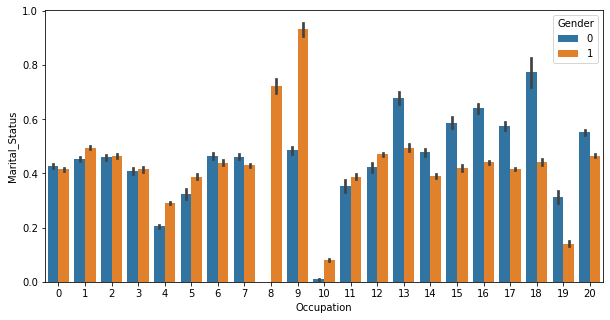

In [30]:

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Occupation', y='Marital_Status', hue='Gender', )
plt.style.use(['dark_background'])


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

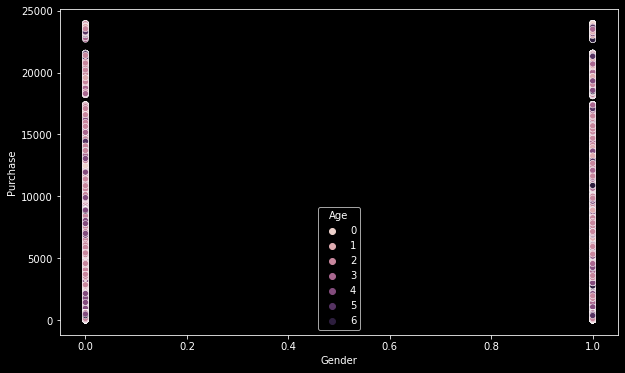

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Gender', y='Purchase', hue='Age', )

<AxesSubplot:xlabel='Product_Category_1', ylabel='Gender'>

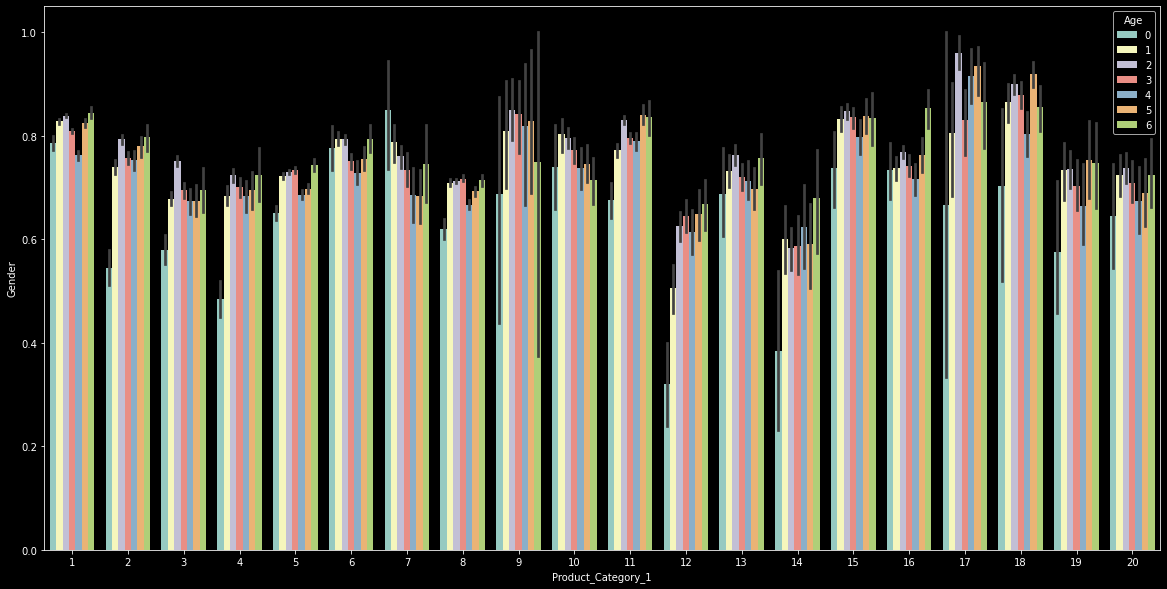

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(data=df ,x='Product_Category_1', y='Gender', hue='Age')

In [33]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,0,3,8.0,16.0,8370
1,0,0,10,2,0,1,6.0,14.0,15200


In [34]:
x=df.drop(['Purchase'], axis=1)
x

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,2,0,3,8.0,16.0
1,0,0,10,2,0,1,6.0,14.0
2,0,0,10,2,0,12,8.0,16.0
3,0,0,10,2,0,12,14.0,16.0
4,1,6,16,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0
550064,0,2,1,3,0,20,8.0,16.0
550065,0,2,15,4,1,20,8.0,16.0
550066,0,6,1,2,0,20,8.0,16.0


In [35]:
y = df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [36]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [37]:
x.shape

(550068, 8)

In [38]:
y.shape

(550068,)

In [173]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.3, random_state=42)

In [174]:
x_train=x_train.values

In [175]:
model =DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

In [183]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,0,3,8.0,16.0,8370
1,0,0,10,2,0,1,6.0,14.0,15200


In [188]:
predict = model.predict(x_test)
predict

array([15491.        , 19245.        ,  5958.33333333, ...,
       10692.        , 23418.        ,  7377.67567568])

In [185]:
model.score(x_train, y_train)

0.7953504418497856

In [162]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor( n_estimators=200)
model3.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [96]:
model3.score(x_train, y_train)

0.8028698238366127

In [97]:
predict3 = model3.predict(x_test)
predict3

array([14602.22783333, 12797.63546603,  6631.80939881, ...,
        7770.15543079, 18664.23097619, 13881.01791667])

In [84]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [109]:
predict2 = model2.predict(x_test)
predict2

array([11137.19749038,  6850.96611133,  5517.02163303, ...,
       12306.63634008, 11861.9516127 , 10450.21303188])

In [110]:
model.score(x_train, y_train)

0.5678044026606182

In [111]:
print(": ",r2_score(y_test, predict))

:  -0.8367559160505451
